In [10]:
!pip install mlxtend

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
#%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [151]:
train = pd.read_csv("gun_control.csv")
train.head(10)
#test = pd.read_csv("female.csv")
#combine = pd.concat([train.drop('Survived',1),test])

,gender,age,region,political_affiliation,should_background_checks_on_gun_buyers_be_more_extensive,should_there_be_more_restrictions_on_who_can_buy_a_gun,will_further_gun_control_reduce_the_possibilities_of_mass_shootings,should_civilians_be_allowed_to_own_guns
0,Female,17 or younger,"East North Central (Illinois, Indiana, Michiga...",Libertarian Party,No,No,Yes,Yes
1,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Green Party,Yes,Yes,Yes,Yes
2,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
3,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Green Party,Yes,Yes,Yes,No
4,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Republican Party,Yes,Yes,Yes,No
5,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
6,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
7,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
8,Female,18 to 24 years,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
9,Female,18 to 24 years,"Mid-Atlantic (New Jersey, New York, and Pennsy...",Democratic Party,Yes,Yes,Yes,No


In [39]:
train.describe()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 8 columns):
gender                                                                 560 non-null object
age                                                                    560 non-null object
region                                                                 560 non-null object
political_affiliation                                                  560 non-null object
should_background_checks_on_gun_buyers_be_more_extensive               560 non-null object
should_there_be_more_restrictions_on_who_can_buy_a_gun                 560 non-null object
will_further_gun_control_reduce_the_possibilities_of_mass_shootings    560 non-null object
should_civilians_be_allowed_to_own_guns                                560 non-null object
dtypes: object(8)
memory usage: 35.1+ KB
None


In [44]:
female = train[train['gender']=='Female']
male = train[train['gender']=='Male']

female_col = "blue"
male_col = "red"


print("Female: %i (%.1f percent), Male: %i (%.1f percent), Total: %i"\
      %(len(female), 1.*len(female)/len(train)*100.0,\
        len(male), 1.*len(male)/len(train)*100.0, len(train)))



Female: 272 (48.6 percent), Male: 288 (51.4 percent), Total: 560


In [62]:
#train['gender'] = train['gender'].map({'Female': 1, 'Male': 0})


Text(0.5,1,'Ratio of acceptance and rejection')

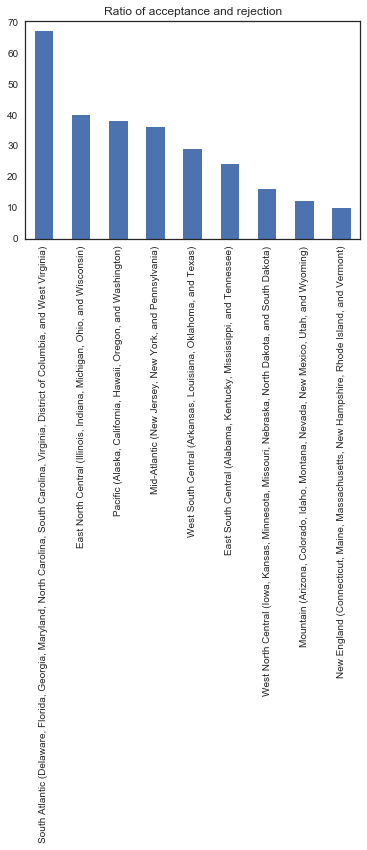

In [69]:

#sns.barplot( 'age','gender',data=train)
#deposit = train['gender'].value_counts()
#deposit.plot(kind='bar')
#plt.title('Ratio of acceptance and rejection')



Text(0.5,1,'Count of regional Male counts')

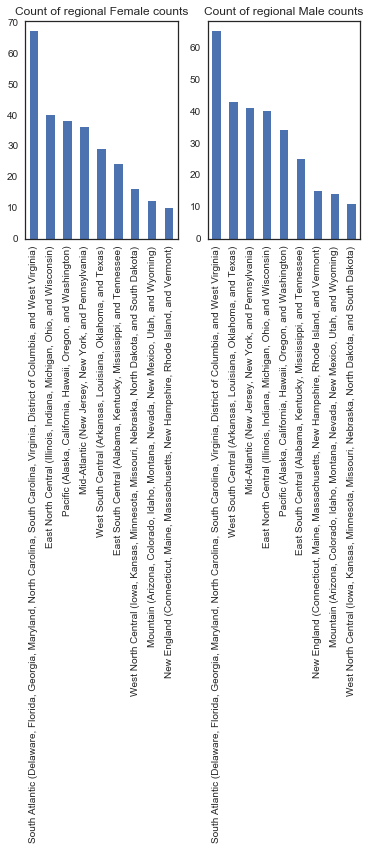

In [81]:
plt.subplot(121)
regionFemale = train['region'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')
plt.subplot(122)
regionMale = train['region'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')

Text(0.5,1,'Count of regional Female counts')

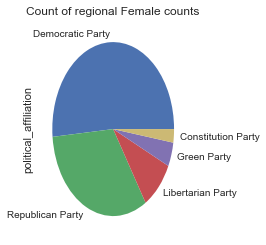

In [120]:
plt.subplot(121)
a = train['political_affiliation'].value_counts()
a.plot(kind='pie')
plt.title('Count of regional Female counts')




Text(0.5,1,'Count of regional Female counts')

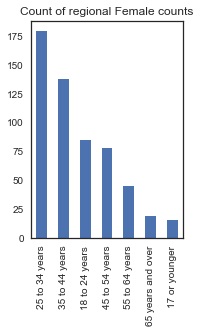

In [122]:
plt.subplot(122)
a = train['age'].value_counts()
a.plot(kind='bar')
plt.title('Count of regional Female counts')

In [88]:
list(train.columns.values)

['gender',
 'age',
 'region',
 'political_affiliation',
 'should_background_checks_on_gun_buyers_be_more_extensive\xa0',
 'should_there_be_more_restrictions_on_who_can_buy_a_gun',
 'will_further_gun_control_reduce_the_possibilities_of_mass_shootings',
 'should_civilians_be_allowed_to_own_guns\xa0']

# 


Text(0.5,1,'Count of regional Male counts')

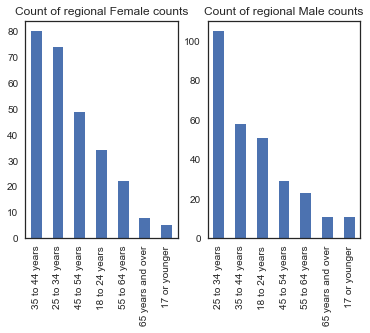

In [152]:
plt.subplot(121)
regionFemale = train['age'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')
plt.subplot(122)
regionMale = train['age'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')

# Political Affiliation


## What percentage of people from different political Affiliation think that background checks on gun buyers should be more extensive?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers should be more extensive are:

* Democratic Party    :  47.678571
* Republican Party    : 27.678571
* Libertarian Party   :  6.964286
* Green Party         :  3.750000
* Constitution Party  :  2.142857

Democratic Party      47.678571
Republican Party      27.678571
Libertarian Party      6.964286
Green Party            3.750000
Constitution Party     2.142857
Name: political_affiliation, dtype: float64


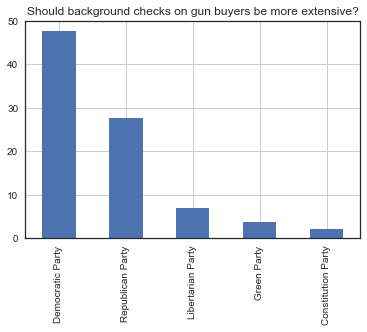

In [168]:

a = train['political_affiliation'][train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'].value_counts()/len(train['political_affiliation'])*100
a.plot(kind='bar',grid = True)
plt.title('Should background checks on gun buyers be more extensive?')
print(a)

# Political Affiliation


## What percentage of people from different political Affiliation think that there should be more restrictions on who can buy a gun?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers who think there should be more restrictions on who can buy a gun:

* Democratic Party      47.500000
* Republican Party      25.892857
* Libertarian Party      6.785714
* Green Party            4.285714
* Constitution Party     1.607143

Democratic Party      47.500000
Republican Party      25.892857
Libertarian Party      6.785714
Green Party            4.285714
Constitution Party     1.607143
Name: political_affiliation, dtype: float64


Text(0.5,1,'Should there be more restrictions on who can buy a gun?')

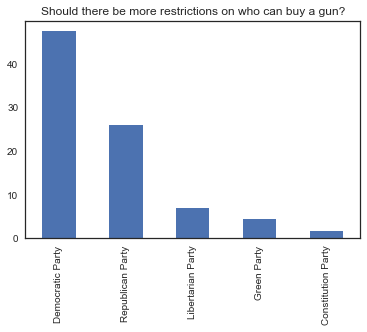

In [170]:
print(a)
a = train['political_affiliation'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()/len(train['political_affiliation'])*100
a.plot(kind='bar')
plt.title('Should there be more restrictions on who can buy a gun?')

Democratic Party      47.678571
Republican Party      27.678571
Libertarian Party      6.964286
Green Party            3.750000
Constitution Party     2.142857
Name: political_affiliation, dtype: float64
Democratic Party      47.500000
Republican Party      25.892857
Libertarian Party      6.785714
Green Party            4.285714
Constitution Party     1.607143
Name: political_affiliation, dtype: float64
Democratic Party      37.500000
Republican Party      16.071429
Libertarian Party      4.107143
Green Party            2.857143
Constitution Party     1.428571
Name: political_affiliation, dtype: float64
Democratic Party      37.678571
Republican Party      27.321429
Libertarian Party      7.500000
Green Party            3.571429
Constitution Party     2.321429
Name: political_affiliation, dtype: float64


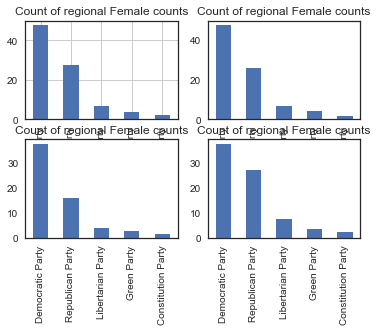

In [163]:


print(a)
plt.subplot(222)
a = train['political_affiliation'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()/len(train['political_affiliation'])*100
a.plot(kind='bar')
plt.title('Count of regional Female counts')
print(a)

plt.subplot(223)
a = train['political_affiliation'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()/len(train['political_affiliation'])*100
a.plot(kind='bar')
plt.title('Count of regional Female counts')
print(a)

plt.subplot(224)
a = train['political_affiliation'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()/len(train['political_affiliation'])*100
a.plot(kind='bar')
plt.title('Count of regional Female counts')
print(a)



Text(0.5,1,'Count of regional Female counts')

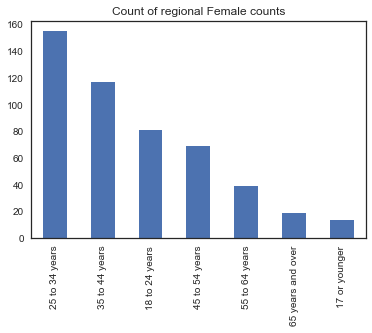

In [91]:

a = train['age'][train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'].value_counts()
a.plot(kind='bar')
plt.title('Count of regional Female counts')


In [71]:

regionFemale = train['region'][data.gender=='Female']
regionFemale = train['region'][data.gender=='Female']
plt.figure()



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [ ]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(female['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(male['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=train)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))